# Import libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

# Import csv

In [19]:
cabdata = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')
usholiday= pd.read_csv('US Holiday Dates.csv')

# Check data types

In [7]:
cabdata.info()
city.info()
customer.info()
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

Get the number of total number columns and features

In [14]:
arr = np.array([cabdata.shape,city.shape,customer.shape,transaction.shape])
np.add(0, arr.sum(axis=0))

array([848681,     17])

Check for duplicates and nulldata

In [15]:
ids = cabdata["Transaction ID"]
cabdata[ids.isin(ids[ids.duplicated()])].sort_values("Transaction ID")

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


In [17]:
cabdata.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [23]:
cabdata = cabdata.drop_duplicates()
cabdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 21.9+ MB


cabdata did not have duplicates and a glance (via excel) at the other datasets do not reveal duplicates nor nulldata

Create a profit column of cabdata

In [32]:
cabdata['profit'] = cabdata['Price Charged'] - cabdata['Cost of Trip']

# Outlier detection

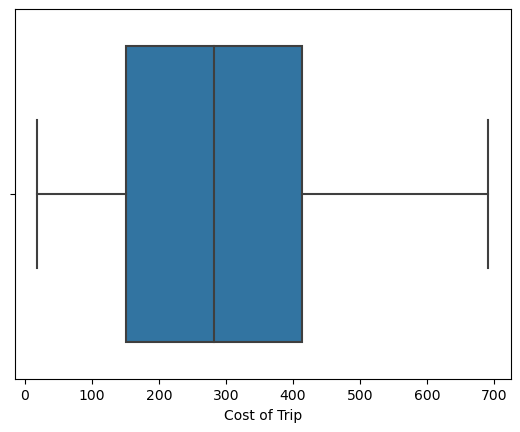

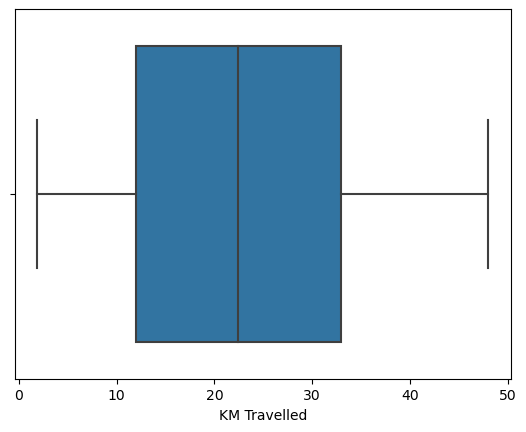

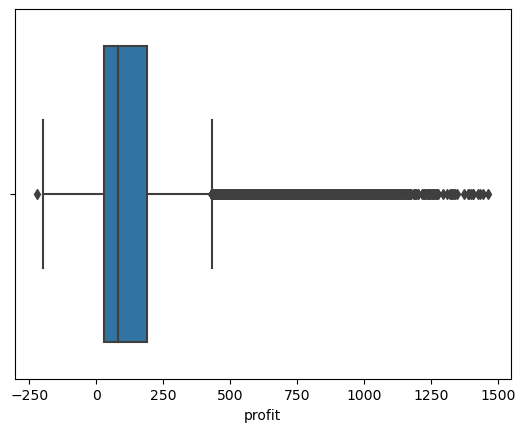

In [33]:
sns.boxplot(x="Cost of Trip",data=cabdata)
plt.show()
sns.boxplot(x="KM Travelled",data=cabdata)
plt.show()
sns.boxplot(x="profit",data=cabdata)
plt.show()

In [85]:
cabdata.drop('Transaction ID',axis=1).describe()

,KM Travelled,Price Charged,Cost of Trip,profit
count,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,137.253198
std,12.233526,274.378911,157.993661,160.311840
min,1.900000,15.600000,19.000000,-220.060000
25%,12.000000,206.437500,151.200000,28.012000
50%,22.440000,386.360000,282.480000,81.962000
75%,32.960000,583.660000,413.683200,190.030000
max,48.000000,2048.030000,691.200000,1463.966000


In [86]:
customer.drop('Customer ID',axis=1).describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


# Analysis

In [44]:
customer['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [55]:
cabdata.groupby(by='Company').count()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,profit
Company,,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681,274681


In [57]:
tran_cust = transaction.merge(customer, on = 'Customer ID')
merge = cabdata.merge(tran_cust, on = 'Transaction ID')

In [61]:
merge.groupby(by='Company').nunique()['Customer ID']

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

In [66]:
cabdata.groupby('Company').sum()['profit']

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: profit, dtype: float64

In [70]:
cabdata.groupby('Company').sum()['profit']/merge.groupby(by='Company').nunique()['Customer ID']

Company
Pink Cab       164.161099
Yellow Cab    1103.378112
dtype: float64

Profit is higher for Yellow Cab AND the number of unique users is only 7k apart! Thus the ratio of profit per user is much higher for Yellow Cab.

In [74]:
merge.groupby(by='Company').count()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
Company,,,,,,,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681


In [77]:
merge.groupby('Gender').mean()['Income (USD/Month)']

Gender
Female    15057.968954
Male      15042.005799
Name: Income (USD/Month), dtype: float64

In [80]:
merge.groupby('Gender').nunique()['Customer ID']

Gender
Female    21473
Male      24675
Name: Customer ID, dtype: int64

In [81]:
merge.groupby('Gender').sum()['profit']

Gender
Female    2.046195e+07
Male      2.886575e+07
Name: profit, dtype: float64

While there are more male customers than female customers, making profits larger from males, the average income recorded shows similar income disparity between the genders.

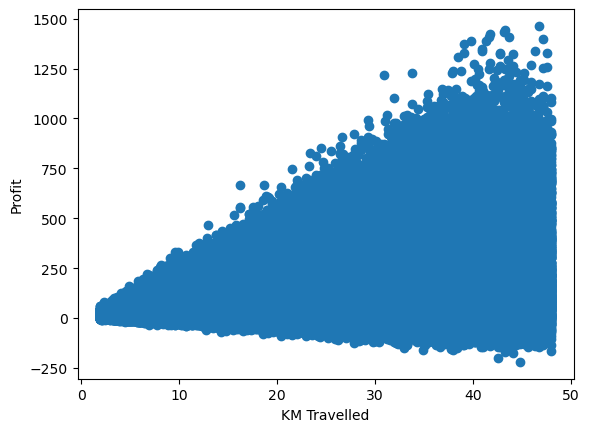

In [92]:
plt.scatter(cabdata['KM Travelled'],cabdata['profit'])
plt.xlabel('KM Travelled')
plt.ylabel('Profit')
plt.show()

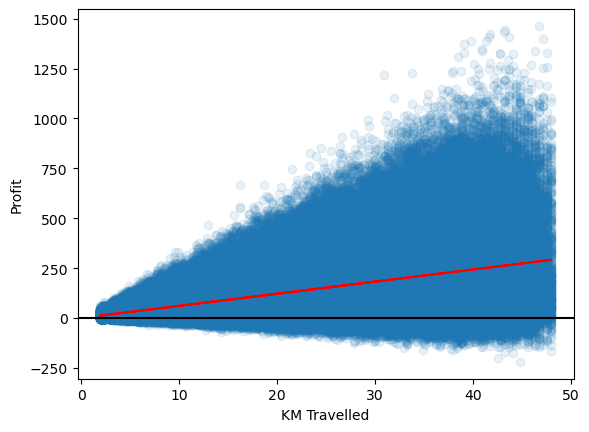

In [109]:
X = cabdata['KM Travelled'].values.reshape(-1, 1)
y = cabdata['profit'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X,y)

plt.scatter(X, y, alpha=.1)
plt.plot(X, reg.predict(X),color='red')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.xlabel('KM Travelled')
plt.ylabel('Profit')
plt.show()

Hypothesis and Conclusions:

1. Profit is proportional to number of users.
True, but Yellow Cab has noticeably more profit per user than Pink cab.

2. The value of Pink Cab may come from having users in underserved cities.
False, See my Tableau worksheet https://public.tableau.com/views/DataGlacierInternshipWeek2/Sheet5?:language=en-US&:display_count=n&:origin=viz_share_link. Distribution of users is similar across all cities for both companies.

3. Holidays explain peaks and dips in profit.
False, See my Tableau worksheet https://public.tableau.com/views/DataGlacierInternshipWeek2/Sheet7?:language=en-US&:display_count=n&:origin=viz_share_link. Holidays only make up a small portion of profit.

4. Male and female customers have similar incomes.
True based on the XYZ's customers in these cities. However, there is a gender wage gape in the US among the general population. 

5. Profit increases with distance traveled.
True. As obvious as this is, there are also many outliers in profit with greater distance. Additionally, losses in profit also increase with distance but not as much as the gain.


Recommendations:

1. Time of day should be included in the data. Additionally, other data like change in user base and change in population over time should be included.
2. Miles are more appropriate for American companies.
3. Yellow cab should receive investment based on total profit and profit per user.